# Introduction and Dataset Description
Since this is an introductory article, the problem that we are going to solve is pretty simple. Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not. Our dataset looks like this.

In [ ]:
import pandas as pd
import numpy as np

!gdown --id -q 1EJmU7Mli1oXLPJfXGrus0HHfVnXM6wpk
!unzip -q Data.zip

data = pd.read_csv('Data.csv')
data.head()

,Person,Smoking,Obesity,Exercise,Diabetic
0,Person 1,0,1,0,1
1,Person 2,0,0,1,0
2,Person 3,1,0,0,0
3,Person 4,1,1,0,1
4,Person 5,1,1,1,1


In the above table, we have five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.

It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. Our task is to create a neural network that is able to predict whether an unknown person is diabetic or not from the given data about his exercise habits, obesity, and smoking habits. This is a type of supervised learning problem where we are given inputs and corresponding correct outputs and our task is to find the mapping between the inputs and the outputs.

**Note**: This is just a fictional dataset, in real life, obese people are not necessarily always diabetic.

# The Solution
We will create a very simple neural network with one input layer, one hidden layer (that will contain two hidden units) and one output layer. Before writing any actual code, let's first let's see how our neural network will execute, in theory. For simplicity, we are not considering the bias term.<br>
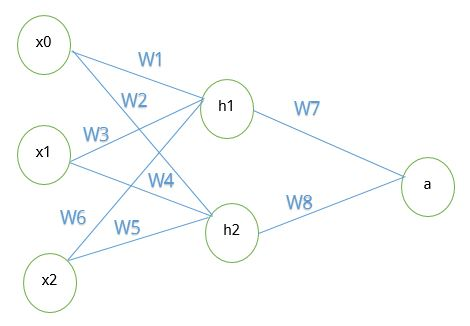



### Separating feature values from labels

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

print(f'X:\n {X}')
print(f'y:\n {y}')

X:
 [[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
y:
 [[1]
 [0]
 [0]
 [1]
 [1]]


### Weight Initialization
At first, we will consider random weights. We will store the weights values for input layer and hidden layer in matrix `w1`. Weight values for hidden layer and output layer will be stored in matrix `w2`.<br>
Since, there are 3 input units and 2 hidden units, the dimension of matrix `w1` will be 3 × 2. For the same reason, dimension of matrix `w2` will be 2 × 1.

In [ ]:
number_of_neurons_in_input_layer = len(X[0])
number_of_neurons_in_hidden_layer = 2
number_of_neurons_in_output_layer = 1

w1 = np.random.random((number_of_neurons_in_input_layer, number_of_neurons_in_hidden_layer))
w2 = np.random.random((number_of_neurons_in_hidden_layer, number_of_neurons_in_output_layer))

print(f'w1:\n {w1}')
print(f'w2:\n {w2}')

w1:
 [[0.18682715 0.21718101]
 [0.60542571 0.43679628]
 [0.06607013 0.31647786]]
w2:
 [[0.52882689]
 [0.42711247]]


## Forward Propagation
At first, we will calculate the weighted sum by multiplying `X` with `w1`. Let this result be $z_{h}$.<br>
$$z_h = \sum_{i=1}^{X} x_iw_{1_i}$$

In [ ]:
z_h=np.matmul(X,w1)
print(f'z_h:\n {z_h}')

z_h:
 [[0.6054257062967016 0.4367962842040991]
 [0.06607012893851871 0.316477858943068]
 [0.1868271483768612 0.21718100737228518]
 [0.7922528546735628 0.6539772915763843]
 [0.8583229836120815 0.9704551505194523]]


$z_{h}$ is the value of hidden layer. To keep this value between 0 and 1, we will pass it through a `sigmoid` function and calculate `a_h`.<br>
$$sigmoid = \frac{1}{1+_e{-x}}$$

In [ ]:
def sigmoid(x):
    return (1/(1+np.exp(-x.astype(float))))

In [ ]:
a_h = sigmoid(z_h)
print(f'a_h:\n {a_h}')

a_h:
 [[0.64689664 0.60749539]
 [0.51651153 0.57846564]
 [0.5465714  0.55408284]
 [0.68831486 0.65790618]
 [0.70231016 0.72521021]]


Now we'll calculate the value of output layer by multiplying the value of hidden layer `a_h` with `w2`. Then, we'll pass the resultant value through a sigmoid function which in turn will return us the final value `a_o`.<br>
$$z_o = \sum_{i=1}^{} a_{h_i}w_{2_i}$$<br>
$$a_o = sigmoid(z_o)$$


In [ ]:
z_o=np.matmul(a_h,w2)
a_o=sigmoid(z_o)
print(f'a_o:\n {a_o}')

a_o:
 [[0.64601432]
 [0.62719806]
 [0.62847903]
 [0.65588269]
 [0.66399461]]


But, this is not our final output. We'll calculate the `error` from the difference between our ground truth `y` and `a_o`.<br>
$$error, E_{a_o} = \frac{1}{2} (a_o-y)^2$$

In [ ]:
error = (0.5*(np.power((a_o-y),2)))
print(f'error:\n {error}')

error:
 [[0.06265293200418263]
 [0.1966887012370924]
 [0.19749294494232733]
 [0.05920836068092048]
 [0.056449811474031]]


## Back Propagation

### Updating `w2`
Back Propagation will start now. This means that in order to minimize the error that we have received, we will repeatedly update the weights of the `w1` and `w2` matrix back from the output layer and calculate the error. In this way we can reduce the error a lot at a time and predict the value which will be closer to the actual output.<br>

So first we will find out how much change in the weights of `w2` will reduce our error. We will deduct the value of $\frac {dE_{a_o}}{dw_2}$ from $w_2$.<br>
$$w_2 = w_2 - learningRate×\frac{dEa_o}{dw_2}$$.<br>
From the chain rule of calculus, we can calculate the value of $\frac {dE_{a_o}}{dw_2}$ as follows,<br>

$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{da_o} × \frac {d{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{da_o} = \frac{d}{da_o}(\frac{1}{2} (a_o-y)^2)=a_o-y$$<br>


In [ ]:
dEdao = a_o-y
print(f'dEdao:\n {dEdao}')

dEdao:
 [[-0.3539856833381334]
 [0.6271980568163336]
 [0.6284790289935335]
 [-0.3441173075592696]
 [-0.3360053912485066]]


Now, the second therm which is needed to calculate $\frac {dE_{a_o}}{dw_2}$ is basically the derivative of the `sigmoid` function.<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}(\frac{1}{1+_e{-z_o}})$<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}({1+_e{-z_o}})^{-1}$<br>
$\frac{da_o}{dz_o} = (-1)({1+_e{-z_o}})^{-2}(-e^{-z_o})$<br>
....<br>....<br>
$\frac{da_o}{dz_o} =\frac{1}{1+_e{-z_o}}×(1-\frac{1}{1+_e{-z_o}}) = sigmoid(z_o)×(1-sigmoid(z_o))=a_o×(1-a_o)$

In [ ]:
def sigmoid_derivative(x):
    return x*(1-x)
daozo = sigmoid_derivative(a_o)
print(f'daozo:\n {daozo}')

daozo:
 [[0.22867982]
 [0.23382065]
 [0.23349314]
 [0.22570059]
 [0.22310577]]


The last term,<br>
$$\frac{dz_o}{dw_2} = \frac{d}{dw_2}(a_h×w_2) = a_h$$<br>
Now, we have all the necessary information to calculate $\frac {dE_{a_o}}{dw_2}$

In [ ]:
dEdw2 = np.matmul(a_h.T, (dEdao*daozo))
print(f'dEdw2:\n {dEdw2}')

dEdw2:
 [[-0.002519768828039698]
 [0.011502763261814208]]


Now, we'll update the weight values of `w2` by subtracting $\frac{dEa_o}{dw_2}$ from `w2`. But, for faster convergence, we'll multiply $\frac{dEa_o}{dw_2}$ by `learning_rate = 3`.

In [ ]:
learning_rate = 3
w2 = w2 - learning_rate*dEdw2
print(f'w2:\n {w2}')

w2:
 [[0.5363861989892291]
 [0.3926041833308501]]


### Updating `w1`
Now we will go one more step backward. The updated value of `w1` will be, $$w_1 = w_1 - learningRate×\frac{dEa_o}{dw_1}$$.<br>
Now, using chain rule as before, we will calculate the value of $\frac{dEa_o}{dw_1}$.<br>


$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{dz_h}×\frac{dz_h}{dw_1}$$
$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{da_h}×\frac{da_h}{dz_h}×\frac{dz_h}{dw_1}$$
Since, there is no direct relationship between $dEa_o$ and $da_h$, we have to break them again using chain rule as follows.
$$\frac{dEa_o}{da_h} = \frac{dEa_o}{dz_o}×\frac{dz_o}{da_h} = \frac{dEa_o}{da_o}×\frac{da_o}{dz_o}×\frac{dz_o}{da_h}$$
But, we have already calculated the value of $\frac{dEa_o}{da_o}×\frac{da_o}{dz_o}$ while updating `w2`. So,
$$\frac{dz_o}{da_h} = \frac{d}{da_h}(a_h×w_2) = w_2$$

In [ ]:
dEdzo = dEdao*daozo
dEdah = np.matmul(dEdzo, w2.T)
print(f'dEdah:\n {dEdah}')

dEdah:
 [[-0.04342013138109366 -0.031781066054860974]
 [0.07866203378526745 0.05757613374767089]
 [0.07871228314001774 0.05761291341672616]
 [-0.04165976332924288 -0.030492576786007742]
 [-0.040210052465817506 -0.02943147090618922]]


We have successfully calculated the value of $\frac{dEa_o}{da_h}$. As it is the derivative of sigmoid, $$\frac{da_h}{dz_h} = a_h\times(1-a_h)$$

In [ ]:
dahdzh = sigmoid_derivative(a_h)
print(f'dahdzh:\n {dahdzh}')

dahdzh:
 [[0.22842138 0.23844474]
 [0.24972737 0.24384314]
 [0.2478311  0.24707505]
 [0.21453751 0.22506564]
 [0.2090706  0.19928036]]


Now, for the last term to calculate $\frac{dEa_o}{dw_1}$,$$\frac{dz_h}{dw_1} = \frac{d}{dw_1}(X×w_1) = X$$

In [ ]:
dEdw1 = np.matmul(X.T, dEdah*dahdzh)
print(f'dEdw1:\n {dEdw1}')

dEdw1:
 [[0.002163030192730727 0.00150676780245007]
 [-0.027262408083112023 -0.020305973561472946]
 [0.011237322991411253 0.008174431270104143]]


Now, we'll update the weight values of `w1` by subtracting $\frac{dEa_o}{dw_1}$ from `w1`.

In [ ]:
w1 = w1-learning_rate*dEdw1
print(f'w1:\n {w1}')

w1:
 [[0.18033805779866902 0.21266070396493497]
 [0.6872129305460376 0.4977142048885179]
 [0.032358159964284955 0.2919545651327556]]


# Prediction

In [ ]:
def predict(X,w1,w2):
    return sigmoid(np.matmul(sigmoid(np.matmul(X,w1)),w2))

In [ ]:
prediction = predict(X, w1,w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

prediction probabilities:
 [[0.64589694]
 [0.62182173]
 [0.62466748]
 [0.65497433]
 [0.66117389]]
prediction:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# Training
Let's run for 500 epochs and check whether the loss decreases or not. In the mean time, the prediction should get better.

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

w1 = np.random.random((3,2))
w2 = np.random.random((2,1))

epochs = 50
learning_rate = 3

for i in range(0, epochs):
    z_h=np.matmul(X,w1)
    a_h = sigmoid(z_h)
    z_o=np.matmul(a_h,w2)
    a_o=sigmoid(z_o)
    error = (0.5*(np.power((a_o-y),2)))
    print(f'error in epoch {i+1}: {np.sum(error)}')


    dEdao = a_o-y
    daozo = sigmoid_derivative(a_o)
    dEdw2 = np.matmul(a_h.T, (dEdao*daozo))
    learning_rate = 3
    w2 = w2 - learning_rate*dEdw2

    dEdzo = dEdao*daozo
    dEdah = np.matmul(dEdzo, w2.T)
    dahdzh = sigmoid_derivative(a_h)
    dEdw1 = np.matmul(X.T, dEdah*dahdzh)
    w1 = w1-learning_rate*dEdw1

prediction = predict(X, w1, w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

error in epoch 1: 0.6055671795428343
error in epoch 2: 0.5861934020402343
error in epoch 3: 0.5801992382076726
error in epoch 4: 0.573456406457542
error in epoch 5: 0.565226230371567
error in epoch 6: 0.5550574438754144
error in epoch 7: 0.5424054859145401
error in epoch 8: 0.5266510383110632
error in epoch 9: 0.5071437631676978
error in epoch 10: 0.4833010458025725
error in epoch 11: 0.45477620264618696
error in epoch 12: 0.4216734838194231
error in epoch 13: 0.38471439091413007
error in epoch 14: 0.34520462802191837
error in epoch 15: 0.30474128314285576
error in epoch 16: 0.26486313494808267
error in epoch 17: 0.22696157720301618
error in epoch 18: 0.19238259678913638
error in epoch 19: 0.16225682470502198
error in epoch 20: 0.1370754566609425
error in epoch 21: 0.11658743454824871
error in epoch 22: 0.10010647609071777
error in epoch 23: 0.08685038876604631
error in epoch 24: 0.07612057821157725
error in epoch 25: 0.06735370640004315
error in epoch 26: 0.06011507513455858
error in 

### Tasks
1. Implement a neural network model to categorize three species of Iris. The dataset can be found [here](https://www.kaggle.com/uciml/iris). Your neural network model should contain **two** hidden layers with as many neurons as you want. For this task, use of any libraries other than `numpy` and `pandas` is prohibited. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch.

1. Implement a neural network model to categorize three species of Iris using **Keras** library from python. The dataset can be found [here](https://www.kaggle.com/uciml/iris). Your neural network model should contain **two** hidden layers with as many neurons as you want. For this task, use of any library is permissible. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch. This [link](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) might help you implementing a neural network with **Keras**.

1. For the task `2`, experiment with different number of hidden layers (*2, 4, 6*) to increase the accuracy score. Also show the effect of followings on overall performance: **different activation function (*relu, sigmoid, tanh*) for layers**, **different optimizers (*Adam, Adagrad, Adadelta*)**, and **various learning rates (*1, 0.1, 0.01*)**.
<br>
<br>
*N.B.: Any additional experiment (such as, Early Stopping) with justification or training insights will contain bonus points.*
    

### Solution: Task - 1

Downloading and reading the `Iris.csv` dataset.

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"syedrifatraiyan","key":"b3417e6aeda142b2ed58a6605816ce3a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d uciml/iris
!unzip iris

iris.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  iris.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Iris.csv                
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         


In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Shuffling the dataset as it is **better** both for separating the dataset into train/test/validation and for avoiding overfitting.

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,12,4.8,3.4,1.6,0.2,Iris-setosa
1,103,7.1,3.0,5.9,2.1,Iris-virginica
2,77,6.8,2.8,4.8,1.4,Iris-versicolor
3,50,5.0,3.3,1.4,0.2,Iris-setosa
4,31,4.8,3.1,1.6,0.2,Iris-setosa


Converting the features from the dataframe to feature `numpy` matrix `X`.

In [ ]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = X.to_numpy()
print(X[:5])

[[4.8 3.4 1.6 0.2]
 [7.1 3.  5.9 2.1]
 [6.8 2.8 4.8 1.4]
 [5.  3.3 1.4 0.2]
 [4.8 3.1 1.6 0.2]]


Converting the `'Species'` column of the dataframe to a `numpy` array `y` and one-hot encoding it. Here, `('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')` is converted to its corresponding one-hot encoded form `([1, 0, 0], [0, 1, 0], [0, 0, 1])`.

In [ ]:
y = data[['Species']]
y = y.to_numpy()
# y[y == 'Iris-setosa'] = [1, 0, 0]
# y[y == 'Iris-versicolor'] = [0, 1, 0]
# y[y == 'Iris-virginica'] = [0, 0, 1]

y = np.where(y == 'Iris-setosa', [1, 0, 0], y)
y = np.where(y == 'Iris-versicolor', [0, 1, 0], y)
y = np.where(y == 'Iris-virginica',  [0, 0, 1], y)

print(y[:5])

[[1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]]


Splitting the shuffled dataset into **train/validation/test** sets with a proportion of `60:20:20`. As the total number of data points is 150, the final size of the train, validation and test sets become 90, 30 and 30.

In [ ]:
# training, validation and test set should have a ratio of 60:20:20 => 90:30:30
X_train = X[:90]
y_train = y[:90]

X_val = X[90:120]
y_val = y[90:120]

X_test = X[120:]
y_test = y[120:]

print(len(X_train),len(X_val),len(X_test))
print(len(y_train),len(y_val),len(y_test))

90 30 30
90 30 30


*   `initWeights()` randomly initializes the weights stored in `W`. Here, I have used the Uniform Xavier Initialization technique. Each weight, `w`, is drawn from a random uniform distribution of $[-x, x]$ for $x=\sqrt{\frac{2}{inputs + outputs}} = \sqrt{\frac{2}{7}}$

*   `forwardProp()` calculates $A^{[l]} = \sigma(Z^{[l]}) = \sigma(W^{[l]} A^{[l-1]} + b^{[l]})$ for layer $l$. Each layer receives an input and computes an output. The output is computed by first calculating the dot product between the input and the weights of the layer and then passing this dot product through an activation function (in this case, the sigmoid function $\sigma$). The output of each layer is the input of the next. The input of the first layer is the feature vector `x`. The output of the final layer is the prediction of the network.

*   `backwardProp()` at first calculates $\frac{\partial \mathcal{J} }{\partial Z^{[L]}} = dZ^{[L]} = y - A^{[L]}$. For all other layers $l$ preceding layer $L$, $ dZ^{[l-1]} = dA^{[l]} * \sigma'(Z^{[l-1]})$ which is used to calculate $ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = dZ^{[l] T} A^{[l-1]}$. Then the weights are updated with $W^{[l-1]} = W^{[l-1]} + \alpha * \text{ } dW^{[l]}$ and new error is calculated. Essentially, the errors are propagated backwards through the layers to perform corrections. The delta is the back-propagated error of current layer times the Sigmoid derivation of current layer activation. After the error is calculated for current layer, the bias is removed from the weights of the previous layer and this is multipliedwith delta to get error. This is an iterative process that goes from output to input backwards. The first error is the final output error.

*   `sigmoidDerivative()` returns the derivative of the sigmoid function, $\sigma'(z)=\sigma(z)*(1-\sigma(z))=x*(1-x)$.

*   `getPrediction()` returns a vector with the probabality values of for each of the multiple classes. It is in the form $[x, y, z]$ where $x$, $y$, $z$ are real numbers in the range $[0, 1]$. The higher the value of an element, the more confident the network is that it is the correct class.

*   `getAccuracyLogLoss()` returns the proportion of correct predictions (percentile accuracy) and the log-loss of the neural network model, where, $logloss = -\frac{1}{N}\sum_{i}^{N}\sum_{j}^{M}y_{ij} \cdot log(p_{ij})$ and $N$ is the number of data points being considered and $M$ is the number of classes in the Multi-class classification.


In [ ]:
def initWeights(nNodes):
    W = []
    for i in range(1, len(nNodes)):
        w = [[np.random.uniform(-0.5345224838248488, 0.5345224838248488) for k in range(nNodes[i-1] + 1)] for j in range(nNodes[i])] # Xavier Initialization [-sqrt(2/7),sqrt(2/7)]
        W.append(np.matrix(w))
    return W

def forwardProp(x, W, layers):
    a = [x]
    inputs = x
    for l in range(layers):
        z_l = np.dot(inputs, W[l].T)
        a_l = sigmoid(z_l)
        a.append(a_l)
        inputs = np.append(1, a_l)
    return a

def sigmoidDerivative(x):
    return np.multiply(x, 1-x)

def backwardProp(y, a, W, layers, alpha):
    error = np.matrix(y - a[-1]) # da[l]
    for l in range(layers, 0, -1):
        now = a[l]
        prev = np.append(1, a[l-1]) if l > 1 else a[0]
        dZ_l = np.multiply(error, sigmoidDerivative(now))
        dW_l = np.multiply(dZ_l.T, prev)
        W[l-1] = W[l-1] + (alpha * dW_l)
        w = np.delete(W[l-1], [0], axis = 1)
        error = np.dot(dZ_l, w)
    return W

def trainNetwork(X, y, alpha, W, layers):
    for i in range(len(X)):
        x = np.matrix(np.append(1, X[i]))
        a = forwardProp(x, W, layers)
        W = backwardProp(y[i], a, W, layers, alpha)
    return W

def getPrediction(x, W):
    x = np.append(1, x)
    layers = len(W)
    a = forwardProp(x, W, layers)
    output = a[-1].A1    # flatten
    # y_hat = (output == np.max(output, keepdims = True)) * 1
    return output


def getAccuracyLogLoss(X, y, W):
    res = 0
    logloss = 0
    for i in range(len(X)):
        output = getPrediction(X[i], W)
        for j in range(len(y[i])):
            logloss += (y[i, j] * np.log(output[j]))
        y_hat = (output == np.max(output, keepdims = True)) * 1
        # if i == 0: print(output,y_hat,y[i],np.array_equal(y_hat, y[i]))
        if np.array_equal(y_hat, y[i]):
            res += 1
    accuracy = res / len(X)
    logloss = -(1/len(X)) * logloss
    return accuracy, logloss

def runNetwork(X_train, y_train, X_val, y_val, epochs, nNodes, alpha):
    W = initWeights(nNodes)
    layers = len(W)

    epochList = []
    trainAccuracyList = []
    valAccuracyList = []
    trainLossList = []
    valLossList = []

    for epoch in range(1, epochs+1):
        W = trainNetwork(X_train, y_train, alpha, W, layers)
        trainAccuracy, trainLoss = getAccuracyLogLoss(X_train, y_train, W)
        valAccuracy, valLoss = getAccuracyLogLoss(X_val, y_val, W)
        epochList.append(epoch)
        trainAccuracyList.append(trainAccuracy)
        valAccuracyList.append(valAccuracy)
        trainLossList.append(trainLoss)
        valLossList.append(valLoss)
        if epoch % 25 == 0:
            print(f'At epoch = {epoch}, Training Accuracy = {trainAccuracy*100}%, Validation Accuracy = {valAccuracy*100}%, Training Loss = {trainLoss}, Validation Loss = {valLoss}')
    return W, epochList, trainAccuracyList, valAccuracyList, trainLossList, valLossList

I decided to use 5 neurons in both the $1^{st}$ and $2^{nd}$ hidden layers. The number of neurons in the first layer must be equal to the number of features while the number of neurons in the last layer must be equal to the number of classes. `nNodes` is a list consisting of the number of neurons in each layer of the neural network. So, the size of this list is the number of layers in the neural network. Overall, my neural network looks something like,<br>
<!-- <a href="https://ibb.co/9nvNYF1"><img src="https://i.ibb.co/1ZnL2DP/NN2.png" alt="NN2" width=901.17 height=400 border="0"></a><br> -->
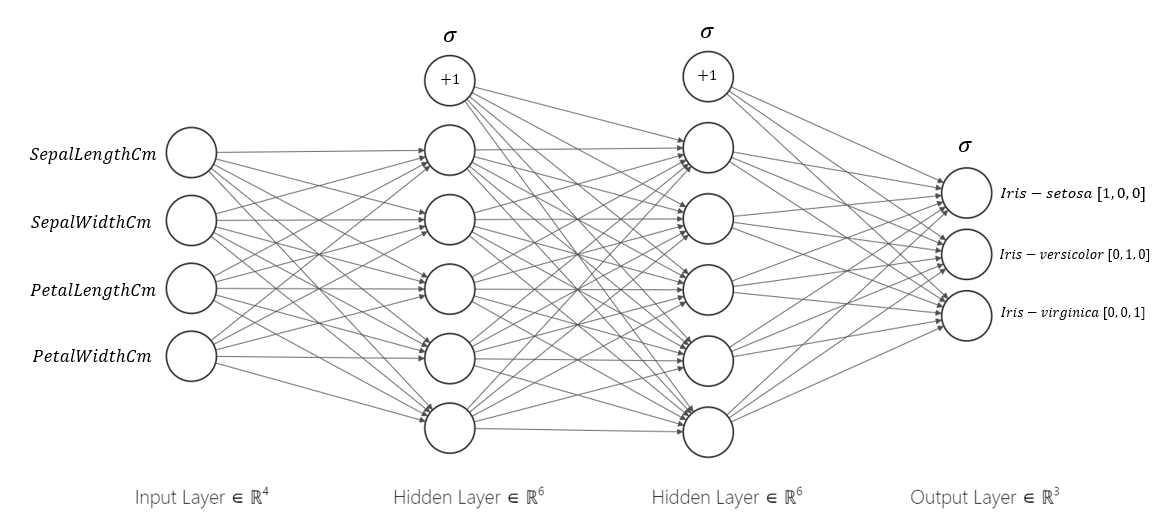
Made using [NN-SVG](http://alexlenail.me/NN-SVG/index.html).

In [ ]:
nNodes = [len(X[0]), 5, 5, len(y[0])]
epochs = 500
alpha = 0.15

W, e, tA, vA, tL, vL = runNetwork(X_train, y_train, X_val, y_val, epochs, nNodes, alpha)

At epoch = 25, Training Accuracy = 38.88888888888889%, Validation Accuracy = 23.333333333333332%, Training Loss = 0.9454545032281254, Validation Loss = 0.9835375937430763
At epoch = 50, Training Accuracy = 68.88888888888889%, Validation Accuracy = 63.33333333333333%, Training Loss = 0.4938313649414229, Validation Loss = 0.45958337492189716
At epoch = 75, Training Accuracy = 96.66666666666667%, Validation Accuracy = 100.0%, Training Loss = 0.28040975168454124, Validation Loss = 0.22023027488759875
At epoch = 100, Training Accuracy = 91.11111111111111%, Validation Accuracy = 93.33333333333333%, Training Loss = 0.2440901960694462, Validation Loss = 0.16693091238399074
At epoch = 125, Training Accuracy = 98.88888888888889%, Validation Accuracy = 100.0%, Training Loss = 0.11916257563068794, Validation Loss = 0.0883637253298672
At epoch = 150, Training Accuracy = 98.88888888888889%, Validation Accuracy = 100.0%, Training Loss = 0.1039577753393296, Validation Loss = 0.07336962768154194
At epo

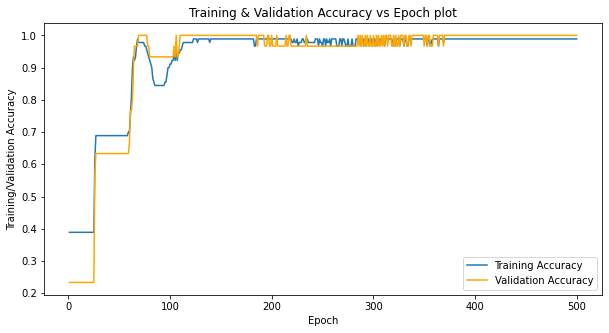

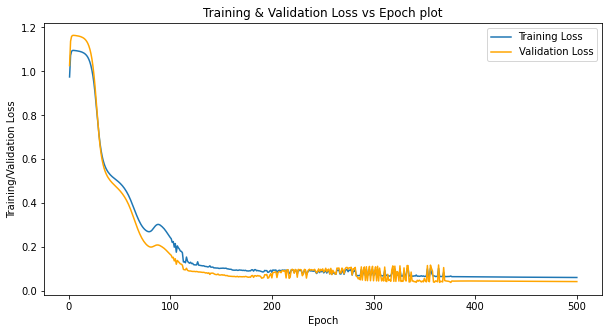

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(e, tA, label='Training Accuracy')
plt.plot(e, vA, label='Validation Accuracy', color='orange')
plt.title("Training & Validation Accuracy vs Epoch plot")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(e, tL, label='Training Loss')
plt.plot(e, vL, '-', label='Validation Loss', color='orange')
plt.title("Training & Validation Loss vs Epoch plot")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()
plt.show()

In [ ]:
testAccuracy, testLoss = getAccuracyLogLoss(X_test, y_test, W)
print(f'Test-set Accuracy = {testAccuracy*100}, Test-set Loss = {testLoss}')

Test-set Accuracy = 93.33333333333333, Test-set Loss = 0.2635446903505468


### Solution: Task - 2

In [ ]:
from keras import models
from keras import layers
import keras

def build_model():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'softmax'))
    neuralNetwork.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

Overall, this neural network looks something like,<br>
<!-- <a href="https://ibb.co/BcY8pkF"><img src="https://i.ibb.co/wB2Dktj/NN1.png" width="901.17" height="400" alt="NN1" border="0"></a><br> -->
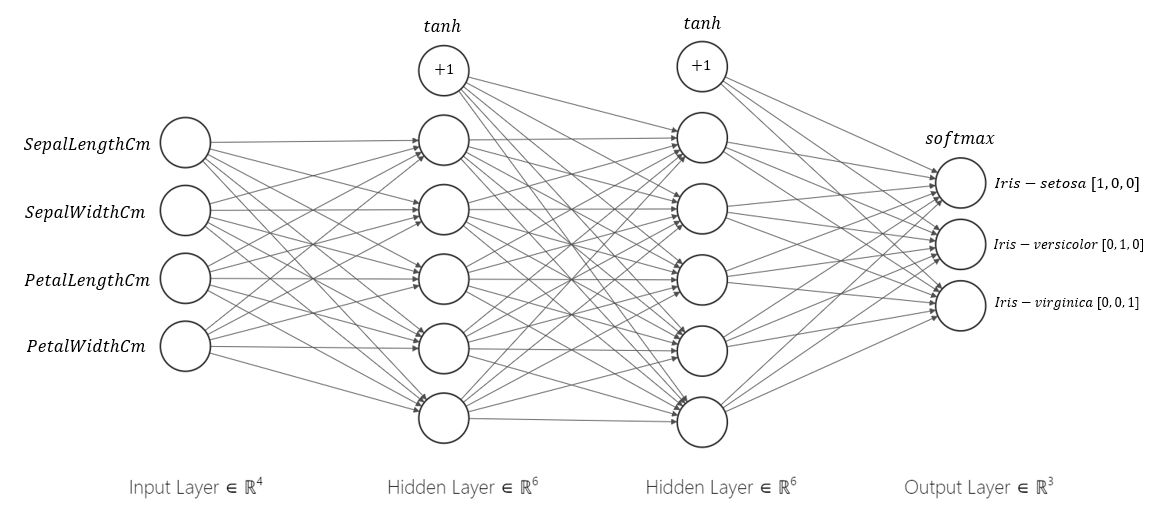
Made using [NN-SVG](http://alexlenail.me/NN-SVG/index.html).

In [ ]:
X_trainf = np.asarray(X_train).astype('float32')
y_trainf = np.asarray(y_train).astype('float32')
X_valf = np.asarray(X_val).astype('float32')
y_valf = np.asarray(y_val).astype('float32')
X_testf = np.asarray(X_test).astype('float32')
y_testf = np.asarray(y_test).astype('float32')

neuralNetwork = build_model()

history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 500, batch_size = 16, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

Validation Loss = 0.02616075612604618, Validation Accuracy = 100.0%
Test-set Accuracy = 93.33333373069763%


In [ ]:
def plot_history(history):
    trainLossListK = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    valLossListK = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    trainAccuracyListK = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    valAccuracyListK = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    epochs = range(1,len(history.history[trainLossListK[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in trainLossListK:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in valLossListK:
        plt.plot(epochs, history.history[l], 'orange', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    ## Accuracy
    plt.figure(2)
    for l in trainAccuracyListK:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1]*100,'.5f'))+'%)')
    for l in valAccuracyListK:    
        plt.plot(epochs, history.history[l], 'orange', label='Validation accuracy (' + str(format(history.history[l][-1]*100,'.5f'))+'%)')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

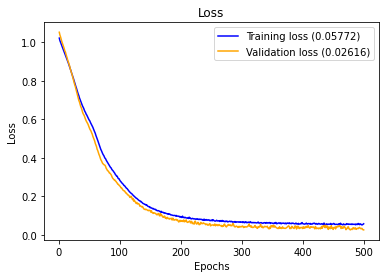

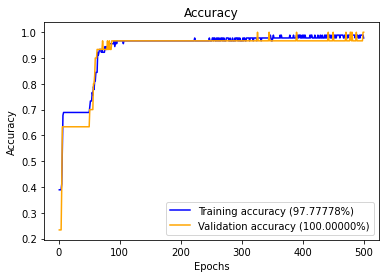

In [ ]:
plot_history(history)

### Solution: Task - 3

In [ ]:
from tensorflow import keras

At first, I tried to find out which optimizer and activation function pair yields the highest test-set accuracy using 6-layered neural networks with 4 hidden layers.

Validation Loss = 0.08533449470996857, Validation Accuracy = 93.33333373069763%
Test-set Accuracy = 86.66666746139526%


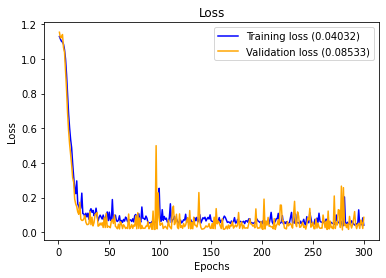

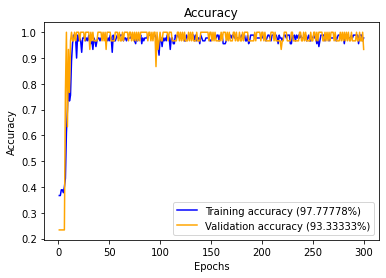

In [ ]:
# 4 hidden layers with Sigmoid activation function and Adam optimizer
def build_model_4AdamSigmoid():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4AdamSigmoid()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.0350901335477829, Validation Accuracy = 100.0%
Test-set Accuracy = 89.99999761581421%


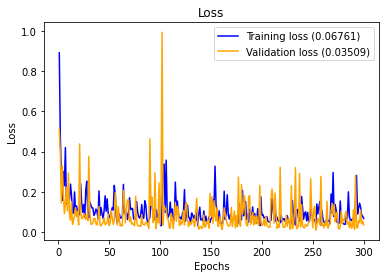

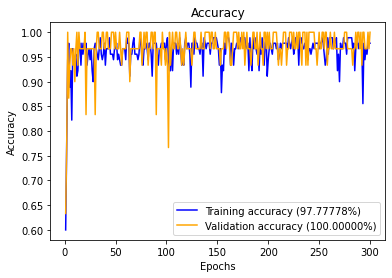

In [ ]:
# 4 hidden layers with tanh activation function and Adam optimizer
def build_model_4Adamtanh():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4Adamtanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.17240659892559052, Validation Accuracy = 96.66666388511658%
Test-set Accuracy = 93.33333373069763%


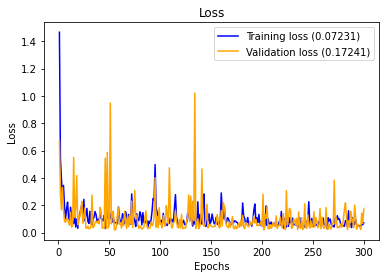

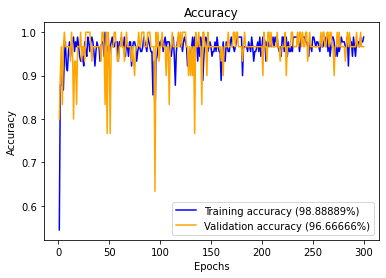

In [ ]:
# 4 hidden layers with relu activation function and Adam optimizer
def build_model_4Adamrelu():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'relu', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4Adamrelu()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 1.1106964349746704, Validation Accuracy = 23.333333432674408%
Test-set Accuracy = 26.66666805744171%


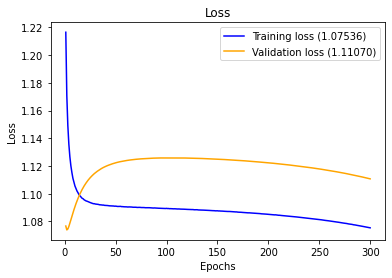

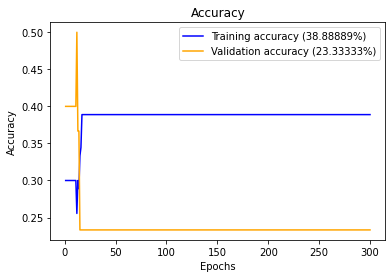

In [ ]:
# 4 hidden layers with sigmoid activation function and Adagrad optimizer
def build_model_4AdagradSigmoid():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adagrad(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4AdagradSigmoid()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.031364746391773224, Validation Accuracy = 100.0%
Test-set Accuracy = 93.33333373069763%


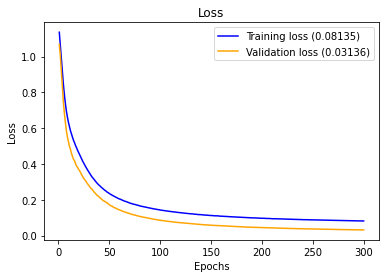

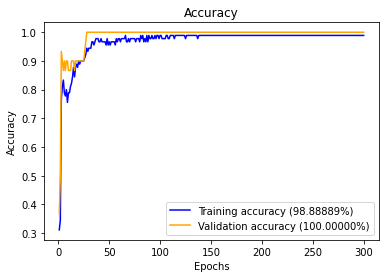

In [ ]:
# 4 hidden layers with tanh activation function and Adagrad optimizer
def build_model_4Adagradtanh():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adagrad(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4Adagradtanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.4241541028022766, Validation Accuracy = 63.333332538604736%
Test-set Accuracy = 63.333332538604736%


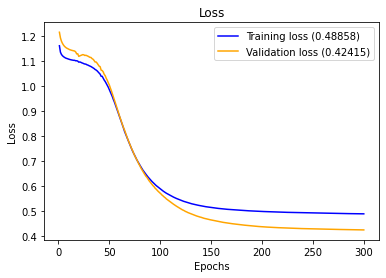

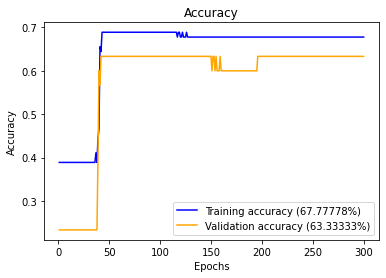

In [ ]:
# 4 hidden layers with relu activation function and Adagrad optimizer
def build_model_4Adagradrelu():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'relu', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adagrad(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4Adagradrelu()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 1.1856396198272705, Validation Accuracy = 23.333333432674408%
Test-set Accuracy = 26.66666805744171%


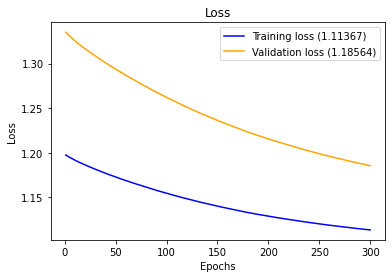

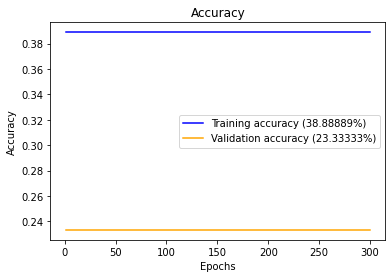

In [ ]:
# 4 hidden layers with sigmoid activation function and Adadelta optimizer
def build_model_4AdadeltaSigmoid():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(5, activation = 'sigmoid'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adadelta(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4AdadeltaSigmoid()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.6344042420387268, Validation Accuracy = 76.66666507720947%
Test-set Accuracy = 73.33333492279053%


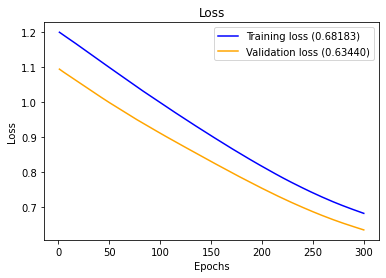

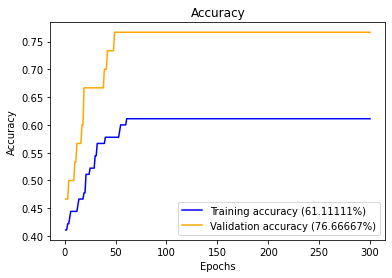

In [ ]:
# 4 hidden layers with tanh activation function and Adadelta optimizer
def build_model_4Adadeltatanh():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adadelta(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4Adadeltatanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 1.1029824018478394, Validation Accuracy = 23.333333432674408%
Test-set Accuracy = 26.66666805744171%


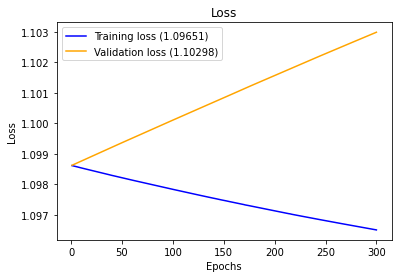

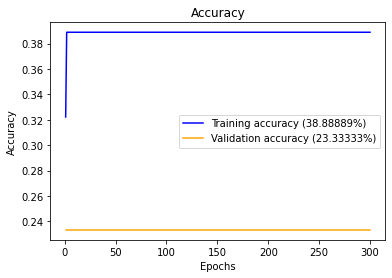

In [ ]:
# 4 hidden layers with relu activation function and Adadelta optimizer
def build_model_4Adadeltarelu():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'relu', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(5, activation = 'relu'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adadelta(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_4Adadeltarelu()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

The experimental findings are shown in the table below:<br>
<!-- <a href="https://ibb.co/2PCPN3p"><img src="https://i.ibb.co/Dkvkpfj/NN3.png" alt="NN3" border="0"></a><br> -->
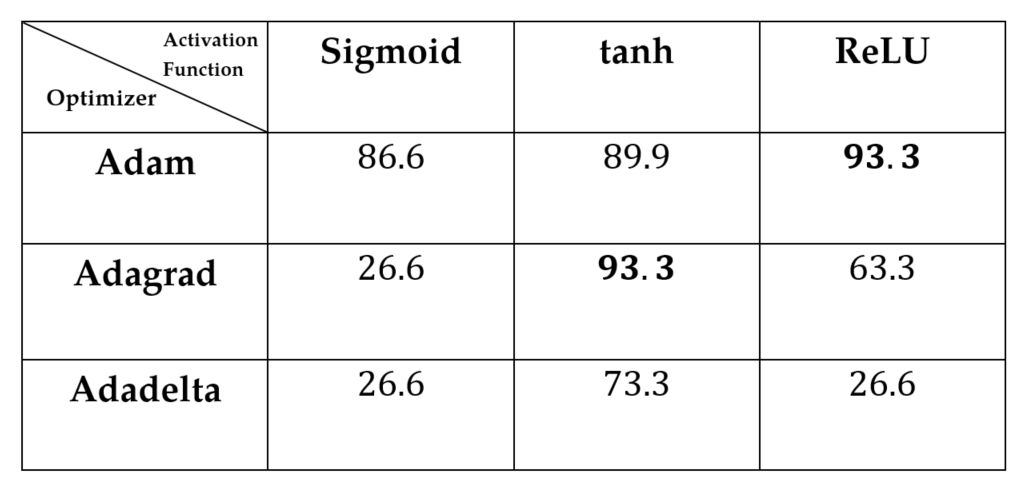
As evident from this, a neural network model using **Adagrad** optimizer and **tanh** as the activation function consistently yields high test-set accuracy.

Now, I tried to see how changing the learning rate affects the accuracy. I used an 8-layered neural network with 6 hidden layers with **Adagrad** optimizer and **tanh** activation function in all layers preceding the last layer and **sigmoid** activation function in the last layer. It looks something like,<br>
<!-- <a href="https://ibb.co/VS6pZmM"><img src="https://i.ibb.co/HzZpsdG/NN4.png" alt="NN4" border="0"></a> -->
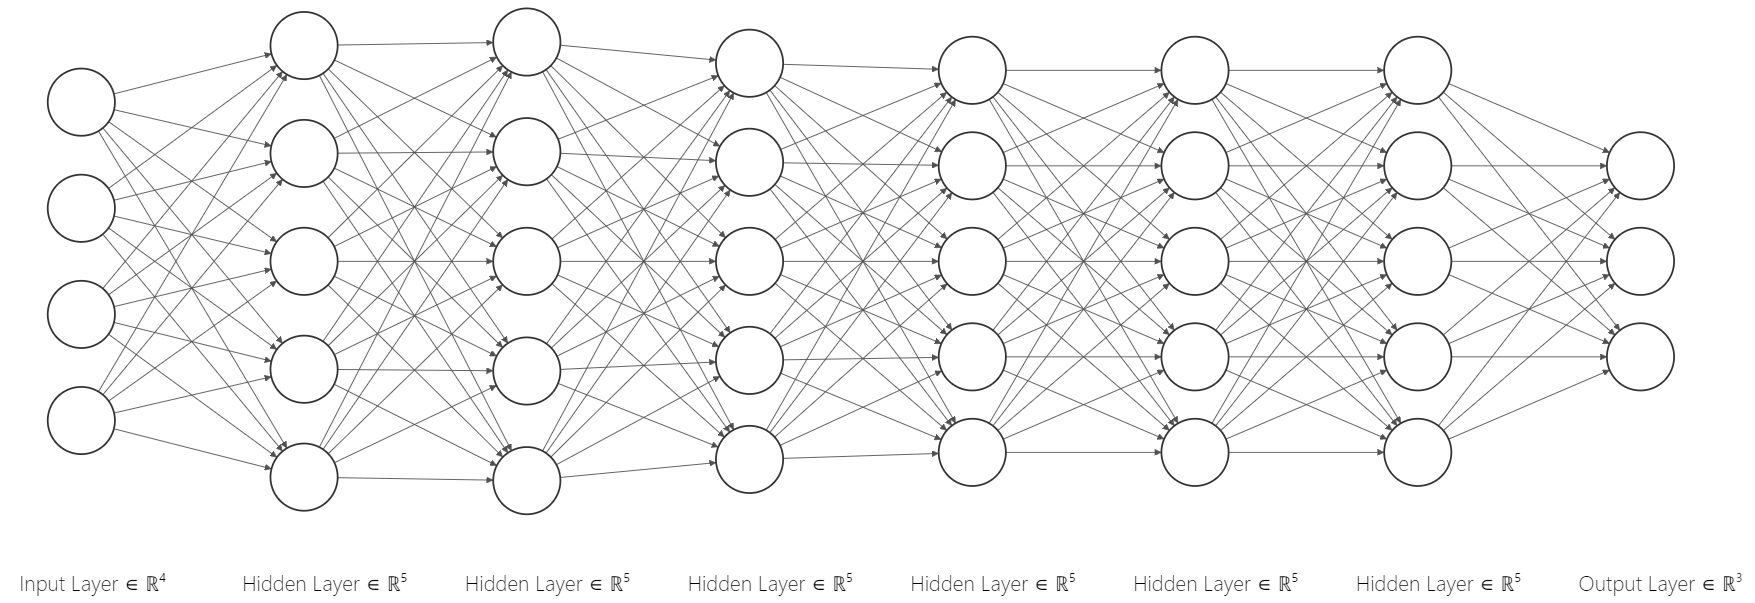
<br>

Validation Loss = 0.07806500047445297, Validation Accuracy = 100.0%
Test-set Accuracy = 93.33333373069763%


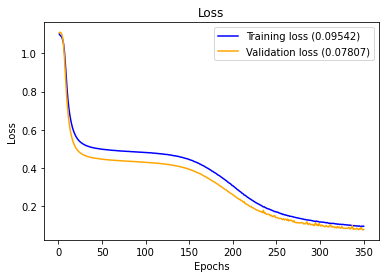

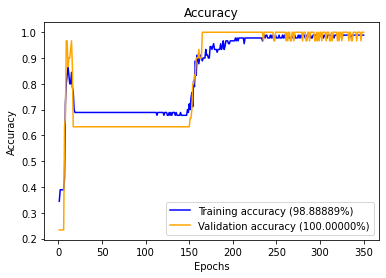

In [ ]:
# 6 hidden layers with tanh activation function and Adagrad optimizer with learning_rate = 0.01
def build_model_6Adagradtanh():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adagrad(learning_rate=0.01)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_6Adagradtanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 350, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.11621113121509552, Validation Accuracy = 96.66666388511658%
Test-set Accuracy = 100.0%


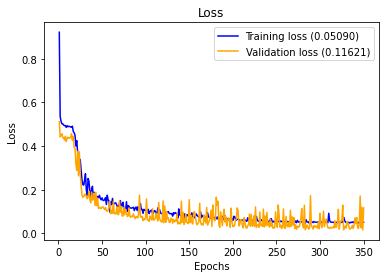

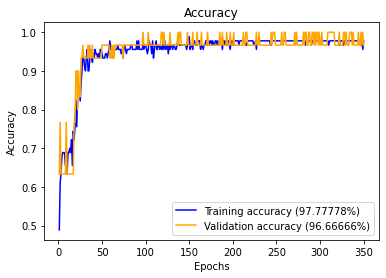

In [ ]:
# 6 hidden layers with tanh activation function and Adagrad optimizer with learning_rate = 0.1
def build_model_6Adagradtanh():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adagrad(learning_rate=0.1)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_6Adagradtanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 350, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 1.125885009765625, Validation Accuracy = 23.333333432674408%
Test-set Accuracy = 26.66666805744171%


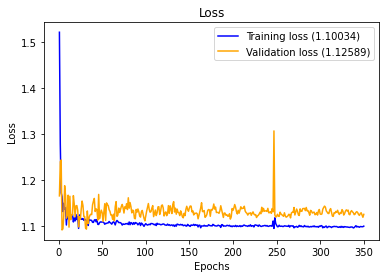

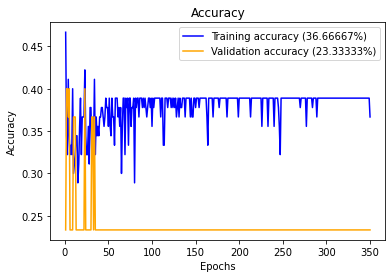

In [ ]:
# 6 hidden layers with tanh activation function and Adagrad optimizer with learning_rate = 1
def build_model_6Adagradtanh():
    neuralNetwork = models.Sequential()
    neuralNetwork.add(layers.Dense(5, activation = 'tanh', input_shape = (X_train.shape[1],)))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(5, activation = 'tanh'))
    neuralNetwork.add(layers.Dense(3, activation = 'sigmoid'))
    opt = keras.optimizers.Adagrad(learning_rate=1)
    neuralNetwork.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return neuralNetwork

neuralNetwork = build_model_6Adagradtanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 350, batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

As evident from the experiments above, the model seems to work worst with a learning rate of $1$ (26.6% accuracy) and best with a learning rate of $0.1$ (100% accuracy).

Now, let's see how **Early Stopping**, a regularization technique, helps me improve the accuracy of the models that yielded comparatively low test-set accuracies.<br>
After incorporating the Early Stopping callback on the 8-layered **Adagrad tanh** model and the 6-layered **Adadelta ReLU** model, I can see that their accuracies ***jumped*** from $26.6\%$ to $36.6\%$ and $63.3\%$ respectively. This happens because I am stopping the training of the neural networks early before they can overfit the training dataset. Consequently, overfitting is reduced and the generalization of the neural networks improves, which means they can generalize better on unexposed test data.

Validation Loss = 1.0773239135742188, Validation Accuracy = 40.00000059604645%
Test-set Accuracy = 36.666667461395264%


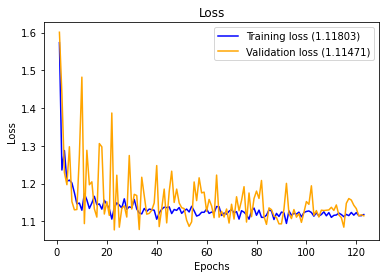

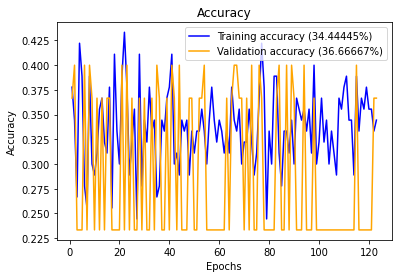

In [ ]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss',
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True,
)

neuralNetwork = build_model_6Adagradtanh()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 350, callbacks=[early_stopping], batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)

Validation Loss = 0.9940890073776245, Validation Accuracy = 56.66666626930237%
Test-set Accuracy = 63.333332538604736%


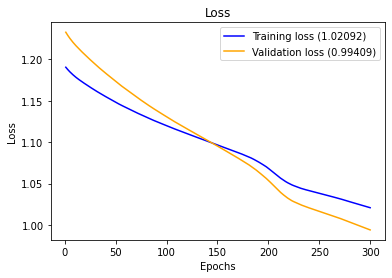

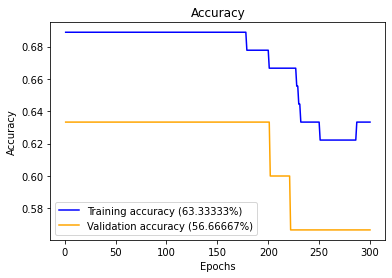

In [ ]:
neuralNetwork = build_model_4Adadeltarelu()
history = neuralNetwork.fit(X_trainf, y_trainf, epochs = 300, callbacks=[early_stopping], batch_size = 2, verbose = 0, validation_data = (X_valf, y_valf))
loss, accuracy = neuralNetwork.evaluate(X_valf, y_valf, verbose = 0)
print(f'Validation Loss = {loss}, Validation Accuracy = {accuracy*100}%')

lossT, accuracyT = neuralNetwork.evaluate(X_testf, y_testf, verbose = 0)
print(f'Test-set Accuracy = {accuracyT*100}%')

plot_history(history)